In [1]:
import numpy as np #科学计算向量库
import pandas as pd #文件IO
import matplotlib.pyplot as plt #导入画函数曲线的库
import scipy.io as sio #高级文件IO
from scipy.optimize import minimize

In [2]:
# 定义激活函数 logistic=1/[1+e^(-z)]
def sigmoid(z):
    #注意python的广播机制，这里的z可能不是一个数，而是一个numpy向量
    return 1/(1+np.exp(-z));

In [3]:
# 定义模型的输出函数  f(假设函数)
def predict(X,theta_final):
    
    h = sigmoid(X@theta_final) #(5000,401) (401,10) =>(5000,10)
    
    h_argmax = np.argmax(h,axis=1)
    print(h_argmax.shape)
    return h_argmax

In [4]:
def plot_an_image_and_predict(X,raw_X,theta_final):
    pick_one = np.random.randint(5000) 
    image = raw_X[pick_one,:]
    fig,ax = plt.subplots(figsize=(1,1))
    ax.imshow(image.reshape(20,20).T,cmap = 'gray_r')
    y_pred = predict(X[pick_one:pick_one+1,:],theta_final)
    print(y_pred)
    #plt.xticks([])
    #plt.yticks([])

In [5]:
# 从ex3data1.mat读数据，并结构化X  theta  y
data=sio.loadmat('ex3data1.mat') #读入数据，数据格式为（key,value）
raw_X=data['X']
raw_y=data['y']
X  = np.insert(raw_X,0,values=1,axis=1)#在第0列插入一列1
y = raw_y.flatten()
theta_final=np.load('LogisticWeight.npy')
y_pred = predict(X,theta_final)
acc = np.mean(y_pred == y)
print(acc)

(5000,)
0.823


(1,)
[6]


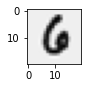

In [6]:
plot_an_image_and_predict(X,raw_X,theta_final)